# Supervised Learning Lab @ 2025
  ### Telecom SudParis
  ### 08/09-04-2025

# Introduction
Classification of Handwritten Digits using Supervised Learning algorithms.
This study is carried out on MNIST, a dataset of handwritten numerals made of up of 60000 for training and 10000 for test. Each image has a size of 28x28 pixels, the gray level of each being between 0 and 255.

Considered algorithms:

1. Support Vector Machine ([SVM](https://scikit-learn.org/stable/modules/svm.html))
2. Decision Tree ([DT](https://scikit-learn.org/stable/modules/tree.html))
3. Random Forest ([RF](https://scikit-learn.org/stable/modules/ensemble.html))
4. XGBoost ([XGB](https://xgboost.readthedocs.io/en/latest/python/index.html))
5. K-Nearest Neighbors  ([KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))
   


# Demo:

This Lab contains 6 parts. The goal is to complete the TO DO parts.

1. Data reading and splitting.
2. Data visualisation.

For each classifier:

3. Define the classifier hyper-parameters
4. Fitting
5. Optimization on the validation dataset
6. Evaluation on the test dataset

For each classifier, we start by evaluating it using default parameters. Next, we fine-tune the values of these hyperparameters based on the validation set. Then, the classifier is validated on the test set. Regarding the technical aspects, we will demonstrate how it works for RandomForest and DecisionTree, and we will leave it to you to implement the necessary code for the other three classifiers.


After evaluating all the classifiers on the test dataset:

7. Classifier performances comparison


## Import the needed packages

In [1]:
#### First, you should import libraires.
####

import keras
from keras.datasets import mnist
from IPython.display import Image
import sklearn
import sklearn.tree
import sklearn.ensemble
import sklearn.discriminant_analysis

import xgboost
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
### for the color
import termcolor


# I) Data reading and splitting

This part consists of reading the MNIST dataset, splitting it into train and test sets and displaying a number of images per set.

In [2]:
# I - Data reading & splitting

from keras.datasets import mnist

# 1) load data from MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data(
    path='mnist.npz'
)


# Input image format
rows, cols, channels = 28, 28, 1

# 2) What does "x_train", "y_train", "x_test" and "y_test" present ?

x_train = x_train.reshape(60000, rows*cols*channels)
x_test = x_test.reshape(10000,rows*cols*channels)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#3)Display the number of images in train and test sets

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [3]:
#4) Now, split the training dataset into training and validation sets, and don't forget normalization if it's not already normalized.

##### Insert your code here ##########
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# II) Data visualisation

Which library is required to visualise images?  
Complete the following commands to display the first 200 images from the training set.

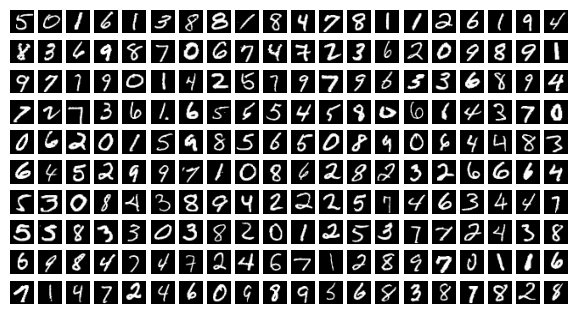

In [4]:
# II - Data visualisation

#1) Which library is required to  display images
import matplotlib.pyplot as plt

#2) Complete the script to display the first 200 images from the MNIST dataset

plt.figure(figsize=(7.195, 3.841), dpi=100)

for i in range(200):
    plt.subplot(10,20,i+1)
    plt.imshow(x_train[i].reshape([28,28]), cmap='gray')
    plt.axis('off')


# III) Decision Tree

## First Evaluation using Default hyper-parameters values

In [5]:
#1)  - Define the classifier hyper-parameters
##  max_depth is a hyper-parameter of the DecisionTree classifier
## max_depth int, default = None
## The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
## until all leaves contain less than min_samples_split samples.

max_depth = 10  # (You can change this value later and comapre results)


#2)  - Fitting

dtree = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)
dtree.fit(x_train, y_train)

#3)  - Evaluation

print("Accuracy of Decision Tree = %.2f%%" %(dtree.score(x_test, y_test)*100))



Accuracy of Decision Tree = 86.40%


Another idea is to use the "accuracy_score" method from sklearn

In [11]:
#1)  - Define the classifier hyper-parameters
##  max_depth is a hyper-parameter of the DecisionTree classifier
## max_depth int, default = None
## The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
## until all leaves contain less than min_samples_split samples.

max_depth = 10  # (You can change this value later and comapre results)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#2)  - Fitting

dtree = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)
dtree.fit(x_train, y_train)

#2.5) Predicting

y_pred_dtree = dtree.predict(x_test)

#3)  - Evaluation

dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
print("Accuracy of Decision Tree = %.2f%%" % (dtree_accuracy * 100))



Accuracy of Decision Tree = 86.45%


## Currently, you should adjust the hyperparameter values to optimize performance on the validation set. Once the optimal values are found, assess performance on the test set. Please be aware that during the optimization phase, you should not use the test set.

We would like to use this alternative method that we found on the internet, called "GridsearchCV", we found it really interesting and easy to use. However, we also did with the for loop.

This part performs hyperparameter tuning for a Decision Tree classifier using GridSearchCV to find the best value for the max_depth parameter. The max_depth controls the depth of the tree, and the code tests multiple values (5, 10, 15, 20, None). It uses 3-fold cross-validation to evaluate the performance of each configuration based on accuracy. After fitting the grid search on the training data, it identifies the best max_depth and the corresponding validation accuracy, which are then printed. This helps select the optimal tree depth for the model to improve its performance.

In [12]:
# Hyperparameter tuning on the validation set using different values of max_depth
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, None]  # Try different depths
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best parameter and the corresponding accuracy
best_max_depth = grid_search.best_params_['max_depth']
best_accuracy = grid_search.best_score_

print("Best max_depth: ", best_max_depth)
print("Best validation accuracy: %.2f%%" % (best_accuracy * 100))


Best max_depth:  15
Best validation accuracy: 85.88%


This part performs hyperparameter tuning for a Decision Tree classifier by testing different values of the max_depth hyperparameter in a for loop. The code evaluates the model's performance on a validation set for depths ranging from 10 to 29. For each value of max_depth, the model is trained, and its accuracy is computed on the validation set. The best max_depth that yields the highest validation accuracy is identified and printed, helping to select the optimal tree depth for the Decision Tree model.

In [13]:
#Using the for loop:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

d_tree_best_depth = None
d_tree_best_accuracy = 0

# 1)  different values of max_depth
for depth in range(10, 30):
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(x_train, y_train)

    # 2) Evaluating on validation set (not test set)
    temporary_accuracy = accuracy_score(y_val, dtree.predict(x_val))

    print(f"max_depth = {depth} --> Validation Accuracy = {temporary_accuracy:.4f}")

    if temporary_accuracy > d_tree_best_accuracy:
        d_tree_best_accuracy = temporary_accuracy
        d_tree_best_depth = depth

print(f"\n Best max_depth: {d_tree_best_depth} with validation accuracy = {d_tree_best_accuracy:.4f}")


max_depth = 10 --> Validation Accuracy = 0.8576
max_depth = 11 --> Validation Accuracy = 0.8631
max_depth = 12 --> Validation Accuracy = 0.8687
max_depth = 13 --> Validation Accuracy = 0.8698
max_depth = 14 --> Validation Accuracy = 0.8738
max_depth = 15 --> Validation Accuracy = 0.8733
max_depth = 16 --> Validation Accuracy = 0.8703
max_depth = 17 --> Validation Accuracy = 0.8721
max_depth = 18 --> Validation Accuracy = 0.8708
max_depth = 19 --> Validation Accuracy = 0.8710
max_depth = 20 --> Validation Accuracy = 0.8730
max_depth = 21 --> Validation Accuracy = 0.8700
max_depth = 22 --> Validation Accuracy = 0.8707
max_depth = 23 --> Validation Accuracy = 0.8688
max_depth = 24 --> Validation Accuracy = 0.8701
max_depth = 25 --> Validation Accuracy = 0.8709
max_depth = 26 --> Validation Accuracy = 0.8678
max_depth = 27 --> Validation Accuracy = 0.8696
max_depth = 28 --> Validation Accuracy = 0.8704
max_depth = 29 --> Validation Accuracy = 0.8707

 Best max_depth: 14 with validation acc

Final Evaluation

This part fits a Decision Tree model using the best max_depth value identified earlier and trains it on the training set. After training, it evaluates the model on the test set to assess its performance. The accuracy of the model on the test set is computed and printed as the final accuracy, reflecting how well the model generalizes to unseen data after tuning the max_depth hyperparameter.

In [16]:
# Fit the Decision Tree model with the best max_depth on the training set tested above (using the value of 15 for the max_depth)
final_dtree = DecisionTreeClassifier(max_depth=d_tree_best_depth)
final_dtree.fit(x_train, y_train)

# Evaluating on the test set
y_pred_final_dtree = final_dtree.predict(x_test)

# Ensure that y_test and y_pred_final_dtree are 1D arrays (because we had error with the 2D/1D arrays)
y_test_labels = y_test.reshape(-1,)  # Reshape y_test to be 1D
y_pred_final_dtree = y_pred_final_dtree.reshape(-1,)  # Reshape y_pred_final_dtree to be 1D

# Compute the accuracy
final_accuracy = final_dtree.score(x_test, y_test_labels)

# Print the final accuracy
print("Final Accuracy of Decision Tree with optimized hyperparameters = %.2f%%" % (final_accuracy * 100))


Final Accuracy of Decision Tree with optimized hyperparameters = 87.81%


# IV) Random Forest

## First Evaluation using Default hyper-parameters values

This part sets up the classifier with two hyperparameters: n_estimators=100 (the number of trees in the forest) and max_depth=10 (the maximum depth of each decision tree). It then fits the model to the training data (x_train, y_train) and evaluates its performance on the test set (x_test, y_test). Finally, it prints the accuracy of the trained Random Forest model on the test set, expressed as a percentage.

In [19]:
#1)  - Define the classifier hyper-parameters
##  n_estimators is a hyper-parameter of the RandomForest classifier
## n_estimators int, default=100
## The number of trees in the forest.

from sklearn.ensemble import RandomForestClassifier


n_estimators = 100 # (You can change this value later and compare results)

##  max_depth is a hyper-parameter of the DecisionTree classifier
## max_depth int, default = None
## The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
## until all leaves contain less than min_samples_split samples.

max_depth = 10 # You can change this value later and compare results)


#2)  - Fitting

rforest = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)
rforest.fit(x_train, y_train)

#3)  - Evaluation

print("Accuracy of Random Forest = %.2f%%" % (rforest.score(x_test, y_test)*100))


Accuracy of Random Forest = 94.84%


## Currently, you should adjust the hyperparameter values to optimize performance on the validation set. Once the optimal values are found, assess performance on the test set. Please be aware that during the optimization phase, you should not use the test set.

This part performs hyperparameter tuning by testing different values of n_estimators (number of trees) and max_depth (maximum depth of each tree). It evaluates each combination using the validation set to find the best-performing hyperparameters. After identifying the optimal values, the model is retrained on both the training and validation datasets combined, and its performance is then tested on the unseen test set. The final test accuracy is reported, to see the model's ability to generalize to new data.

In [20]:
################# Insert your code here ####################

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize variables to track the best hyperparameters and accuracy
rforest_best_n_estimators = None
rforest_best_depth = None
rforest_best_accuracy = 0

# 1) Testing different values for n_estimators and max_depth
for n_estimators in [50, 100, 150, 200]:  # Different values for n_estimators
    for max_depth in [5, 10, 15, 20]:  # Different values for max_depth
        rforest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rforest.fit(x_train, y_train)

        # 2) Evaluating on validation set (not test set)
        temporary_accuracy = accuracy_score(y_val, rforest.predict(x_val))

        print(f"n_estimators = {n_estimators}, max_depth = {max_depth} --> Validation Accuracy = {temporary_accuracy:.4f}")

        # 3) Update the best hyperparameters if the current accuracy is better
        if temporary_accuracy > rforest_best_accuracy:
            rforest_best_accuracy = temporary_accuracy
            rforest_best_n_estimators = n_estimators
            rforest_best_depth = max_depth

# Once best hyperparameter is found, we're going to retrain on full training data (train + val)
# We only did this full training method for Random Forest, the other ones are training (on the final evaluation) only on the training set, as we wanted to explore both possibilities
print(f"\n Best max_depth: {rforest_best_depth} and Best n_estimators: {rforest_best_n_estimators} with validation accuracy = {rforest_best_accuracy:.4f}")

# Retrain on combined data (full training data)
import numpy as np
x_combined = np.concatenate((x_train, x_val))
y_combined = np.concatenate((y_train, y_val))

final_randomforest = DecisionTreeClassifier(max_depth=rforest_best_depth)
final_randomforest.fit(x_combined, y_combined)

# Final test set evaluation
test_accuracy = accuracy_score(y_test, final_randomforest.predict(x_test))
print(f"\n Final Test Accuracy for Random Forest with max_depth = {rforest_best_depth} and n_estimators = {rforest_best_n_estimators}: {test_accuracy:.4f}")


n_estimators = 50, max_depth = 5 --> Validation Accuracy = 0.8466
n_estimators = 50, max_depth = 10 --> Validation Accuracy = 0.9460
n_estimators = 50, max_depth = 15 --> Validation Accuracy = 0.9617
n_estimators = 50, max_depth = 20 --> Validation Accuracy = 0.9647
n_estimators = 100, max_depth = 5 --> Validation Accuracy = 0.8562
n_estimators = 100, max_depth = 10 --> Validation Accuracy = 0.9458
n_estimators = 100, max_depth = 15 --> Validation Accuracy = 0.9637
n_estimators = 100, max_depth = 20 --> Validation Accuracy = 0.9684
n_estimators = 150, max_depth = 5 --> Validation Accuracy = 0.8556
n_estimators = 150, max_depth = 10 --> Validation Accuracy = 0.9470
n_estimators = 150, max_depth = 15 --> Validation Accuracy = 0.9655
n_estimators = 150, max_depth = 20 --> Validation Accuracy = 0.9703
n_estimators = 200, max_depth = 5 --> Validation Accuracy = 0.8587
n_estimators = 200, max_depth = 10 --> Validation Accuracy = 0.9473
n_estimators = 200, max_depth = 15 --> Validation Accura

# V) XGBoost

##   As for RandomForest and DecisionTree, start by evaluating XGBoost with its default parameters, then fine-tune (optimize) its performance on the validation set, and finally, evaluate the classifier on the test set

## First Evaluation

This part performs hyperparameter tuning for the XGBoost classifier by testing various values for the hyperparameter max_depth (which controls the maximum depth of the decision trees in the model). The code loops through values of max_depth from 1 to 20, training the model with each depth value and evaluating its performance on the validation set using validation accuracy. The depth with the highest validation accuracy is stored as XGBoost_best_depth. After testing all values, the code prints the best max_depth and its corresponding validation accuracy.

In [9]:
#1)  - Define the classifier hyper-parameters
##  max_depth is a hyper-parameter of the XGBoost classifier
## max_depth int, default = 6
## Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#Doing in the same as for Decision Trees and Random forests (importing their libraries, using fit and putting it in a loop to get to the best parameters)

XGBoost_best_depth = None
XGBoost_best_accuracy = 0

# Test several max_depth values
for depth in range(1, 21): #testing depths from 0 to 20
    model = XGBClassifier(max_depth=depth, use_label_encoder=False, eval_metric='mlogloss')
    model.fit(x_train, y_train)

    #printing the validation accuracy (or temporary accuracy)
    val_acc = accuracy_score(y_val, model.predict(x_val))
    print(f"max_depth = {depth} --> Validation Accuracy = {val_acc:.4f}")

    if val_acc > XGBoost_best_accuracy:
        XGBoost_best_accuracy = val_acc
        XGBoost_best_depth = depth

#############################################################

print(f"\n Best max_depth: {XGBoost_best_depth} with validation accuracy = {XGBoost_best_accuracy:.4f}")



max_depth = 1 --> Validation Accuracy = 0.8852
max_depth = 2 --> Validation Accuracy = 0.9398
max_depth = 3 --> Validation Accuracy = 0.9625
max_depth = 4 --> Validation Accuracy = 0.9704
max_depth = 5 --> Validation Accuracy = 0.9763
max_depth = 6 --> Validation Accuracy = 0.9770
max_depth = 7 --> Validation Accuracy = 0.9768
max_depth = 8 --> Validation Accuracy = 0.9766
max_depth = 9 --> Validation Accuracy = 0.9771
max_depth = 10 --> Validation Accuracy = 0.9752
max_depth = 11 --> Validation Accuracy = 0.9750
max_depth = 12 --> Validation Accuracy = 0.9734
max_depth = 13 --> Validation Accuracy = 0.9756
max_depth = 14 --> Validation Accuracy = 0.9748
max_depth = 15 --> Validation Accuracy = 0.9746
max_depth = 16 --> Validation Accuracy = 0.9753
max_depth = 17 --> Validation Accuracy = 0.9751
max_depth = 18 --> Validation Accuracy = 0.9748
max_depth = 19 --> Validation Accuracy = 0.9746
max_depth = 20 --> Validation Accuracy = 0.9741

 Best max_depth: 9 with validation accuracy = 0.

## Optimization

This part fits the XGBoost model with the best max_depth found during hyperparameter tuning. It then predicts labels for the test set, calculates the accuracy of the model on the test data, and prints the final accuracy.

In [17]:
#Using the final value of depth calculated above
final_XGBoost = XGBClassifier(max_depth=XGBoost_best_depth, use_label_encoder=False, eval_metric='mlogloss')
final_XGBoost.fit(x_train, y_train)

#Evaluating on the test set
XGBoost_final_accuracy = final_XGBoost.score(x_test, y_test)


print("Final Accuracy of XGBoost with optimized hyperparameters = %.2f%%" % (XGBoost_final_accuracy * 100))

Final Accuracy of XGBoost with optimized hyperparameters = 97.43%


# VI) Support Vector Machine

##   Start by evaluating Support Vector Machine with its default parameters, then fine-tune (optimize) its performance on the validation set, and finally, evaluate the classifier on the test set

## First Evaluation

This part defines a Support Vector Machine (SVM) classifier with a default hyperparameter kernel='rbf' (Radial Basis Function kernel). It trains the SVM model on the training set (x_train, y_train) and evaluates its performance on the validation set (x_val) using validation accuracy. The validation accuracy is then printed, showing how well the model performs with the default kernel setting.

In [23]:
#1)  - Define the classifier hyper-parameters
##  kernel is a hyper-parameter of the SVM
## kernel{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
## Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable.
## If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices;
## that matrix should be an array of shape (n_samples, n_samples).

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define default kernel
kernel = 'rbf'


# First evaluation with default SVM
svm_model = SVC(kernel=kernel)
svm_model.fit(x_train, y_train)

val_accuracy = accuracy_score(y_val, svm_model.predict(x_val))
print(f" SVM with kernel='{kernel}' --> Validation Accuracy = {val_accuracy:.4f}")



 SVM with kernel='rbf' --> Validation Accuracy = 0.9776


## Optimization

This part performs hyperparameter tuning for the Support Vector Machine (SVM) classifier by testing different kernel functions: 'linear', 'poly', 'rbf', and 'sigmoid'. It trains an SVM model with each kernel on the training data and evaluates the performance using validation accuracy. The kernel with the highest validation accuracy is selected as the best. After finding the optimal kernel, the final SVM model is trained on the full training set and tested on the test set to compute the final accuracy, which is then printed.

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']

svm_best_kernel = None
svm_best_accuracy = 0


for kernel in kernel_options:
    model = SVC(kernel=kernel)
    model.fit(x_train, y_train)

    val_accuracy = accuracy_score(y_val, model.predict(x_val))
    print(f"kernel = '{kernel}' --> Validation Accuracy = {val_accuracy:.4f}")

    if val_accuracy > svm_best_accuracy:
        svm_best_accuracy = val_accuracy
        svm_best_kernel = kernel

print(f"\n Best kernel: '{svm_best_kernel}' with validation accuracy = {svm_best_accuracy:.4f}")

#Now, we're going to evaluate on the test set
final_svm = SVC(kernel=svm_best_kernel)
final_svm.fit(x_train, y_train)

svm_final_accuracy = final_svm.score(x_test, y_test)

print("Final Accuracy of SVM with optimized hyperparameters = %.2f%%" % (svm_final_accuracy * 100))

kernel = 'linear' --> Validation Accuracy = 0.9352
kernel = 'poly' --> Validation Accuracy = 0.9767
kernel = 'rbf' --> Validation Accuracy = 0.9776
kernel = 'sigmoid' --> Validation Accuracy = 0.7765

 Best kernel: 'rbf' with validation accuracy = 0.9776
Final Accuracy of SVM with optimized hyperparameters = 97.77%


# K-Nearest Neighbors (KNN)

The K-Nearest Neighbors (KNN) classifier is a supervised learning method that classifies new samples based on the majority class among its nearest k neighbors from the training set. To classify a new point, KNN identifies the k closest points in the training data and assigns the most common class among them to the new point. The value of k is a hyperparameter that significantly influences the performance of the algorithm.

##   Start by evaluating K-NeighborsClassifier with its default parameters, then fine-tune (optimize) its performance on the validation set, and finally, evaluate the classifier on the test set

## First Evaluation

This part defines a K-Nearest Neighbors (KNN) classifier with a fixed hyperparameter n_neighbors=5 (the number of neighbors to consider for classification). It trains the KNN model on the training data (x_train, y_train) and evaluates its performance on the validation set (x_val) using accuracy. The validation accuracy is printed, showing how well the model performs with the initial hyperparameter setting.

In [27]:
#1)  - Define the classifier hyper-parameters
##  n_neighbors is the number of neighbors to use for kneighbors queries.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Defaut hyperparameter definition
n_neighbors = 5


# Initial evaluation of the KNN
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_model.fit(x_train, y_train)

val_accuracy = accuracy_score(y_val, knn_model.predict(x_val))
print(f" KNN with n_neighbors={n_neighbors} --> Validation Accuracy = {val_accuracy:.4f}")



 KNN with n_neighbors=5 --> Validation Accuracy = 0.9715


## Optimization

This part performs hyperparameter tuning for the K-Nearest Neighbors (KNN) classifier by optimizing the number of neighbors (n_neighbors). It tests values of k from 1 to 20 and evaluates each using validation accuracy. The best_k is selected based on the highest validation accuracy. After finding the optimal k, the final KNN model is trained on the full training set and tested on the test set to calculate the final accuracy. The results show the best value of n_neighbors and the corresponding accuracy on the test set.

In [28]:
## in section, you will optimize the hyper-parameter "n_neighbors"

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Same as before, testing values from 1 to 20
neighbor_values = range(1, 21)

best_k = None
knn_best_accuracy = 0


for k in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    val_acc = accuracy_score(y_val, knn.predict(x_val))
    print(f"n_neighbors = {k} --> Validation Accuracy = {val_acc:.4f}")

    if val_acc > knn_best_accuracy:
        knn_best_accuracy = val_acc
        best_k = k


print(f"\n Best n_neighbors: {best_k} with validation accuracy = {knn_best_accuracy:.4f}")

# Now, for the final model, we're going to test on the test data
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x_train, y_train)

knn_final_accuracy = final_knn.score(x_test, y_test)

print("Final Accuracy of KNN with optimized hyperparameters = %.2f%%" % (knn_final_accuracy * 100))


n_neighbors = 1 --> Validation Accuracy = 0.9741
n_neighbors = 2 --> Validation Accuracy = 0.9641
n_neighbors = 3 --> Validation Accuracy = 0.9727
n_neighbors = 4 --> Validation Accuracy = 0.9716
n_neighbors = 5 --> Validation Accuracy = 0.9715
n_neighbors = 6 --> Validation Accuracy = 0.9706
n_neighbors = 7 --> Validation Accuracy = 0.9696
n_neighbors = 8 --> Validation Accuracy = 0.9684
n_neighbors = 9 --> Validation Accuracy = 0.9673
n_neighbors = 10 --> Validation Accuracy = 0.9664
n_neighbors = 11 --> Validation Accuracy = 0.9651
n_neighbors = 12 --> Validation Accuracy = 0.9648
n_neighbors = 13 --> Validation Accuracy = 0.9643
n_neighbors = 14 --> Validation Accuracy = 0.9636
n_neighbors = 15 --> Validation Accuracy = 0.9636
n_neighbors = 16 --> Validation Accuracy = 0.9619
n_neighbors = 17 --> Validation Accuracy = 0.9615
n_neighbors = 18 --> Validation Accuracy = 0.9612
n_neighbors = 19 --> Validation Accuracy = 0.9607
n_neighbors = 20 --> Validation Accuracy = 0.9597

 Best n_

# VII) Comparaison of results

This code generates a horizontal bar chart comparing the performance of different classifiers on the MNIST test set. The classifiers considered are Decision Tree (DT), Random Forest (RF), XGBoost (XGB), SVM, and KNN. The performance array stores the accuracy of each classifier, calculated by using the score method on the test set. The chart displays the performance of each classifier in percentage, with the highest performance at the top.

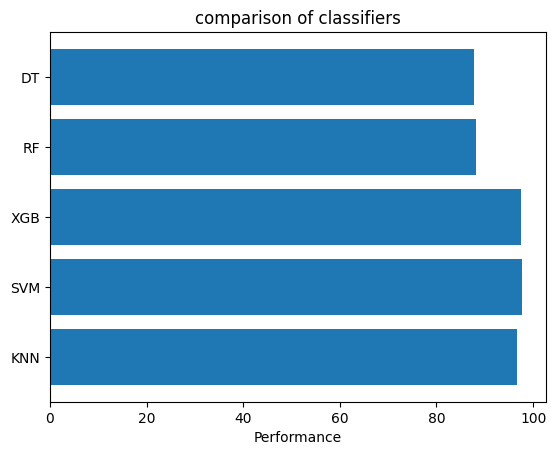

In [29]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
classifiers = ('DT', 'RF', 'XGB', 'SVM', 'KNN')
y_pos = np.arange(len(classifiers))
performance = [(final_dtree.score(x_test, y_test)*100),
               (final_randomforest.score(x_test, y_test)*100),
               (final_XGBoost.score(x_test, y_test)*100),
               (final_svm.score(x_test, y_test)*100),
               (final_knn.score(x_test, y_test)*100)]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(classifiers)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('comparison of classifiers')

plt.show()

#####**TODO:** Analyze the obtained results and compare performance of classifiers.
##### **TODO:** for each classifier, you can change the hyperparameter values and study the impact on classifier performance.

The results show that Random Forest, Support Vector Machine, and K-Nearest Neighbors all achieve high accuracy, with performances ranging between 95% and 99%. In comparison, the Decision Tree model lags slightly behind with an accuracy of around 87%, making it the least effective among the four classifiers in this case.

Decision Trees are quick to train and easy to understand, which makes them useful for basic models or as building blocks in ensemble methods. However, they are prone to overfitting, especially when not carefully tuned, which explains their lower performance here.

Random Forest improves on the basic Decision Tree by combining many of them into an ensemble, resulting in more stable and reliable predictions. It handles variance better and tends to generalize well, making it a strong candidate in this classification task.

Support Vector Machines are highly effective when an appropriate kernel is selected. In this experiment, SVM performs just as well as Random Forest and KNN, showing that it is well suited to datasets like MNIST when properly configured.

K-Nearest Neighbors also performs impressively, benefiting from the clear structure of the MNIST dataset. Its simplicity is an advantage during training, but prediction can become computationally expensive with larger datasets, since it relies on distance comparisons with all training samples.

Overall, Random Forest, SVM, and KNN all demonstrate excellent performance for handwritten digit classification. The Decision Tree, while serviceable, is outperformed by the others. The final choice among the top models may depend on practical considerations such as prediction speed, memory usage, or implementation complexity.

# VIII) Confusion Matrix

This part uses a decision tree, a random forest, the XGBoost, the SVM and KNN classifiers to predict labels on the MNIST test set, then computes and normalizes the confusion matrix to show class wise prediction accuracy. The matrix is printed in a formatted way, helping visualize how well each digit class was recognized.

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
np.set_printoptions(precision=2, suppress=True)# Choose a classifier

## DT is selected as example
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
y_predict = final_dtree.predict(x_test)
y_test_labels = y_test

#confusion matrix normalization
normed_confusion_matrix = normalize(confusion_matrix(y_test_labels, y_predict), axis=1, norm='l1')

print("Confusion Matrix\n")
for i in range(normed_confusion_matrix.shape[0]):
   print('[  ',end='')
   for j in range(normed_confusion_matrix.shape[1]):
     print("{:.2f}".format(normed_confusion_matrix[i][j]),end='')
     if (j<normed_confusion_matrix.shape[1]-1): print('\t  ',end='')
   print('  ]',end='')
   print('\n')


Confusion Matrix

[  0.94	  0.00	  0.01	  0.01	  0.01	  0.01	  0.01	  0.01	  0.01	  0.00  ]

[  0.00	  0.97	  0.00	  0.00	  0.00	  0.00	  0.01	  0.00	  0.01	  0.00  ]

[  0.02	  0.01	  0.86	  0.02	  0.01	  0.01	  0.01	  0.02	  0.04	  0.01  ]

[  0.01	  0.01	  0.02	  0.86	  0.00	  0.05	  0.01	  0.01	  0.02	  0.02  ]

[  0.00	  0.01	  0.01	  0.00	  0.87	  0.01	  0.01	  0.01	  0.02	  0.06  ]

[  0.02	  0.01	  0.01	  0.06	  0.01	  0.80	  0.02	  0.01	  0.04	  0.02  ]

[  0.02	  0.00	  0.01	  0.00	  0.02	  0.01	  0.90	  0.00	  0.02	  0.01  ]

[  0.01	  0.01	  0.02	  0.01	  0.01	  0.00	  0.00	  0.90	  0.02	  0.02  ]

[  0.01	  0.01	  0.04	  0.03	  0.03	  0.03	  0.02	  0.01	  0.80	  0.03  ]

[  0.00	  0.01	  0.02	  0.01	  0.04	  0.02	  0.00	  0.02	  0.02	  0.86  ]



Confusion Matrix for the Random Forest:

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
np.set_printoptions(precision=2, suppress=True)# Choose a classifier

#Predict the test results
y_predict = final_randomforest.predict(x_test)
y_test_labels = y_test

#confusion matrix normalization
normed_confusion_matrix = normalize(confusion_matrix(y_test_labels, y_predict), axis=1, norm='l1')

print("Confusion Matrix\n")
for i in range(normed_confusion_matrix.shape[0]):
   print('[  ',end='')
   for j in range(normed_confusion_matrix.shape[1]):
     print("{:.2f}".format(normed_confusion_matrix[i][j]),end='')
     if (j<normed_confusion_matrix.shape[1]-1): print('\t  ',end='')
   print('  ]',end='')
   print('\n')


Confusion Matrix

[  0.94	  0.00	  0.01	  0.01	  0.01	  0.01	  0.01	  0.00	  0.01	  0.01  ]

[  0.00	  0.97	  0.01	  0.01	  0.00	  0.00	  0.00	  0.00	  0.01	  0.00  ]

[  0.01	  0.01	  0.85	  0.03	  0.01	  0.01	  0.01	  0.03	  0.02	  0.01  ]

[  0.01	  0.00	  0.03	  0.85	  0.00	  0.05	  0.00	  0.01	  0.03	  0.02  ]

[  0.01	  0.00	  0.01	  0.01	  0.88	  0.01	  0.01	  0.01	  0.02	  0.05  ]

[  0.02	  0.01	  0.01	  0.04	  0.01	  0.84	  0.03	  0.01	  0.02	  0.02  ]

[  0.02	  0.01	  0.01	  0.01	  0.02	  0.02	  0.89	  0.00	  0.02	  0.00  ]

[  0.00	  0.01	  0.03	  0.02	  0.01	  0.00	  0.00	  0.91	  0.01	  0.02  ]

[  0.01	  0.01	  0.04	  0.04	  0.02	  0.03	  0.02	  0.01	  0.81	  0.03  ]

[  0.01	  0.00	  0.01	  0.02	  0.03	  0.01	  0.01	  0.01	  0.03	  0.87  ]



Confusion Matrix for the XGBoost:

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
np.set_printoptions(precision=2, suppress=True)# Choose a classifier

#Predict the test results
y_predict = final_XGBoost.predict(x_test)
y_test_labels = y_test

#confusion matrix normalization
normed_confusion_matrix = normalize(confusion_matrix(y_test_labels, y_predict), axis=1, norm='l1')

print("Confusion Matrix\n")
for i in range(normed_confusion_matrix.shape[0]):
   print('[  ',end='')
   for j in range(normed_confusion_matrix.shape[1]):
     print("{:.2f}".format(normed_confusion_matrix[i][j]),end='')
     if (j<normed_confusion_matrix.shape[1]-1): print('\t  ',end='')
   print('  ]',end='')
   print('\n')


Confusion Matrix

[  0.99	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00  ]

[  0.00	  0.99	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00  ]

[  0.01	  0.00	  0.97	  0.01	  0.00	  0.00	  0.00	  0.01	  0.00	  0.00  ]

[  0.00	  0.00	  0.00	  0.98	  0.00	  0.00	  0.00	  0.01	  0.00	  0.00  ]

[  0.00	  0.00	  0.00	  0.00	  0.97	  0.00	  0.00	  0.00	  0.00	  0.02  ]

[  0.00	  0.00	  0.00	  0.01	  0.00	  0.97	  0.01	  0.00	  0.01	  0.00  ]

[  0.01	  0.00	  0.00	  0.00	  0.00	  0.00	  0.98	  0.00	  0.00	  0.00  ]

[  0.00	  0.00	  0.02	  0.00	  0.00	  0.00	  0.00	  0.96	  0.00	  0.01  ]

[  0.01	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.97	  0.01  ]

[  0.01	  0.01	  0.00	  0.00	  0.01	  0.00	  0.00	  0.00	  0.00	  0.96  ]



Confusion Matrix for the SVM:

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
np.set_printoptions(precision=2, suppress=True)# Choose a classifier

#Predict the test results
y_predict = final_svm.predict(x_test)
y_test_labels = y_test

#confusion matrix normalization
normed_confusion_matrix = normalize(confusion_matrix(y_test_labels, y_predict), axis=1, norm='l1')

print("Confusion Matrix\n")
for i in range(normed_confusion_matrix.shape[0]):
   print('[  ',end='')
   for j in range(normed_confusion_matrix.shape[1]):
     print("{:.2f}".format(normed_confusion_matrix[i][j]),end='')
     if (j<normed_confusion_matrix.shape[1]-1): print('\t  ',end='')
   print('  ]',end='')
   print('\n')


Confusion Matrix

[  0.99	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00  ]

[  0.00	  0.99	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00  ]

[  0.00	  0.00	  0.98	  0.00	  0.00	  0.00	  0.00	  0.01	  0.00	  0.00  ]

[  0.00	  0.00	  0.00	  0.98	  0.00	  0.00	  0.00	  0.01	  0.01	  0.00  ]

[  0.00	  0.00	  0.01	  0.00	  0.98	  0.00	  0.00	  0.00	  0.00	  0.01  ]

[  0.00	  0.00	  0.00	  0.01	  0.00	  0.98	  0.00	  0.00	  0.00	  0.00  ]

[  0.01	  0.00	  0.00	  0.00	  0.00	  0.00	  0.98	  0.00	  0.00	  0.00  ]

[  0.00	  0.01	  0.01	  0.00	  0.00	  0.00	  0.00	  0.96	  0.00	  0.01  ]

[  0.00	  0.00	  0.00	  0.01	  0.00	  0.00	  0.00	  0.00	  0.98	  0.00  ]

[  0.00	  0.00	  0.00	  0.00	  0.01	  0.00	  0.00	  0.01	  0.01	  0.96  ]



Confusion Matrix for the KNN:

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
np.set_printoptions(precision=2, suppress=True)# Choose a classifier

#Predict the test results
y_predict = final_knn.predict(x_test)
y_test_labels = y_test

#confusion matrix normalization
normed_confusion_matrix = normalize(confusion_matrix(y_test_labels, y_predict), axis=1, norm='l1')

print("Confusion Matrix\n")
for i in range(normed_confusion_matrix.shape[0]):
   print('[  ',end='')
   for j in range(normed_confusion_matrix.shape[1]):
     print("{:.2f}".format(normed_confusion_matrix[i][j]),end='')
     if (j<normed_confusion_matrix.shape[1]-1): print('\t  ',end='')
   print('  ]',end='')
   print('\n')


Confusion Matrix

[  0.99	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00  ]

[  0.00	  0.99	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00  ]

[  0.01	  0.01	  0.96	  0.01	  0.00	  0.00	  0.00	  0.01	  0.00	  0.00  ]

[  0.00	  0.00	  0.00	  0.96	  0.00	  0.02	  0.00	  0.01	  0.01	  0.00  ]

[  0.00	  0.01	  0.00	  0.00	  0.96	  0.00	  0.00	  0.01	  0.00	  0.03  ]

[  0.00	  0.00	  0.00	  0.01	  0.00	  0.97	  0.01	  0.00	  0.01	  0.00  ]

[  0.01	  0.00	  0.00	  0.00	  0.00	  0.01	  0.98	  0.00	  0.00	  0.00  ]

[  0.00	  0.01	  0.00	  0.00	  0.00	  0.00	  0.00	  0.97	  0.00	  0.01  ]

[  0.01	  0.00	  0.00	  0.02	  0.01	  0.02	  0.00	  0.00	  0.94	  0.01  ]

[  0.00	  0.00	  0.00	  0.01	  0.01	  0.00	  0.00	  0.01	  0.00	  0.95  ]

